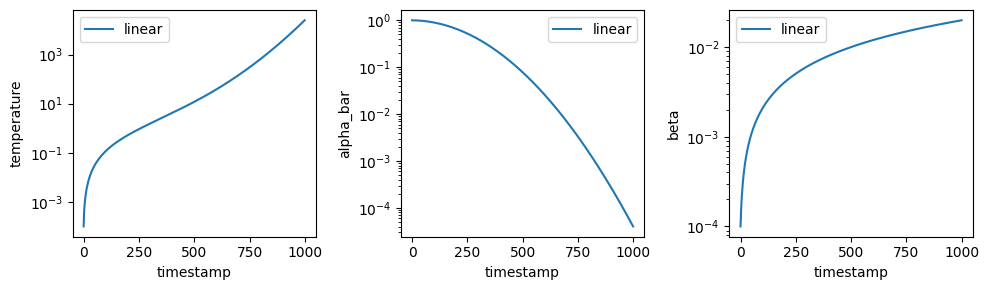

In [2]:
from config import load_config
from diffusion import get_ddpm
import matplotlib.pyplot as plt


cfg = load_config()

cfg.ddpm.schedule_type = "linear_beta"
dyn_linear = get_ddpm(cfg).dynamic
# cfg.ddpm.schedule_type = "flattening_temp"
# dyn_flat = get_ddpm(cfg).dynamic
# cfg.ddpm.schedule_type = "flattening_temp_unbiased"
# dyn_flat_unbiased = get_ddpm(cfg).dynamic


dyns = {
    "linear": dyn_linear,
    # "flat": dyn_flat,
    # "flat_unbiased": dyn_flat_unbiased,
}


plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)

for name, dyn in dyns.items():
    plt.plot(dyn.temp, label=name)

plt.yscale("log")
plt.xlabel("timestamp")
plt.ylabel("temperature")
plt.legend()


plt.subplot(1, 3, 2)

for name, dyn in dyns.items():
    plt.plot(dyn.alpha_bar, label=name)

plt.xlabel("timestamp")
plt.ylabel("alpha_bar")
plt.legend()
plt.yscale("log")


plt.subplot(1, 3, 3)

for name, dyn in dyns.items():
    plt.plot(dyn.beta, label=name)

plt.xlabel("timestamp")
plt.ylabel("beta")
plt.legend()
plt.yscale("log")

plt.tight_layout()
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_25952\2352353678.py:19: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot((dyn_linear.temp - T) / T, label="discrete")


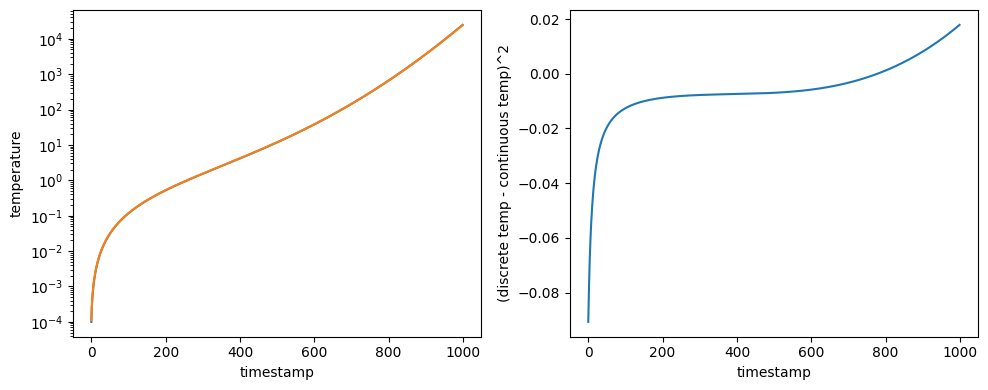

In [27]:
import numpy as np


alpha = np.linspace(1e-3, 1, 1000)
T = np.exp(0.1 * alpha + 10 * alpha ** 2) - 1


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(dyn_linear.temp, label="discrete")
plt.plot(T, label="continuous")
plt.yscale("log")
plt.xlabel("timestamp")
plt.ylabel("temperature")


plt.subplot(1, 2, 2)
plt.plot((dyn_linear.temp - T) / T, label="discrete")
plt.xlabel("timestamp")
plt.ylabel("(discrete temp - continuous temp)^2")
# plt.yscale("log")


plt.tight_layout()
plt.show()